In [184]:
import pandas as pd
data = pd.read_csv('./data/all_data.csv', encoding='utf-8')
data

low = data.loc[:,'ADQ1':]

def not_star(x):
    if x == "*":
        x = 0
    return x
low = low.applymap(not_star)

low = low[low['y'] != 0]
low = low[low['ADQ2'] != 0]
# low['y'].astype('category')

new_data = pd.DataFrame()

new_data['컴퓨터_보유'] = low['Q1A1'].replace(2,0)
new_data['노트북_보유'] = low['Q1A2'].replace(2,0)
new_data['휴대폰1_보유'] = low['Q2A11'].replace(3,0)
new_data['휴대폰2_보유'] = low['Q2A12'].replace(3,0)
new_data['스마트패드_보유'] = low['Q2A2'].replace(2,0)
new_data['스마트_주변기기_보유'] = low['Q2A3'].replace(2,0)
new_data['인터넷이용'] = low['Q3'].replace(2,0)
new_data = pd.concat([new_data,low.loc[:,'Q']])





new_data['연령'] = low['ADQ1']
new_data['성별'] = low['ADQ2']
# new_data['직업1'] = low['ADQ3'] #onehot
# new_data['직업2'] = low['ADQ3A']
new_data['학력'] = low['ADQ4']
new_data['장애여부'] = low['ADQ5']
new_data['가구주'] = low['ADQ6'].replace([1,2],[0,1])
new_data['가구거주'] = low['ADQ7']
new_data['가구구성형태'] = low['ADQ8'].replace([1,2],[0,1])
new_data['시군'] = low['ADQ102'].replace([1,2],[0,1])
new_data['동읍면'] = low['ADQ103'].replace([1,2],[0,1])
#  ['직업1','직업2','가구거주']
one_hot_columns = ['가구거주']
new_data['y'] = low['y']




In [208]:
low.loc[:,'Q2A3':'Q4A4']

KeyError: 'Q2A3'

In [185]:
#XGboost
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
lbl =LabelEncoder()
new_data['성별'] = lbl.fit_transform(new_data['성별'].astype(str))
new_data['시군'] = lbl.fit_transform(new_data['시군'].astype(str))
# new_data['직업1'] = lbl.fit_transform(new_data['직업1'].astype(str))

<AxesSubplot:xlabel='y', ylabel='count'>

C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


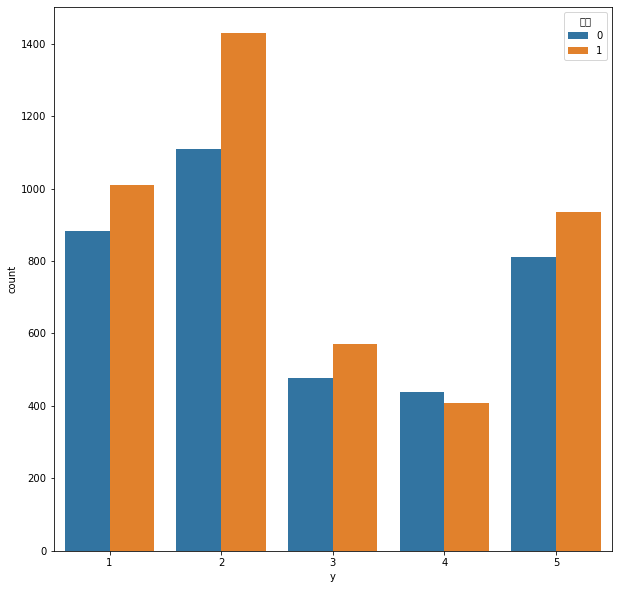

In [203]:
import matplotlib.pyplot as plt
new_data_male = new_data[new_data['성별'] == 0]
new_data_female = new_data[new_data['성별'] == 1]

plt.figure(figsize = (10,10))
sns.countplot(x= 'y', hue = '성별' ,data=new_data)


55 90


C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)


연령        3064
성별        3064
학력        3064
장애여부      3064
가구주       3064
가구거주      3064
가구구성형태    3064
시군        3064
동읍면       3064
y         3064
dtype: int64

<Figure size 720x720 with 0 Axes>

C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0, flags=flags)


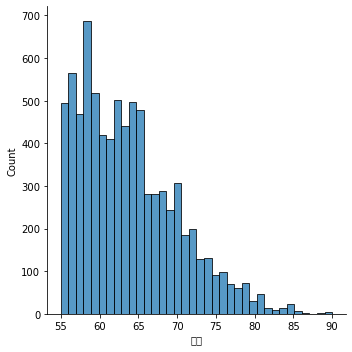

In [217]:
plt.figure(figsize = (10,10))
sns.displot(new_data['연령'])
print(new_data['연령'].min(),new_data['연령'].max())
new_data[new_data['연령'] >= 65 ].count()

In [181]:
new_data = pd.get_dummies(new_data,columns = one_hot_columns)

In [154]:
# # 중복행 삭제
# print(new_data['y'].value_counts())
# new_data = new_data.drop_duplicates()
# new_data['y'].value_counts()

In [155]:
#모델 분리
feature_columns = new_data.columns.difference(["y"]) # new_y를 제외한 모든 행
X = new_data[feature_columns]
y = new_data['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42,stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7262, 12) (807, 12) (7262,) (807,)


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.35811648079306074


C:\Users\wodud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
import numpy as np
from sklearn import neighbors,datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

clf = neighbors.KNeighborsClassifier(5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.3420074349442379


In [158]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#비선형 SVM 분류모델을 학습하고 평가
svm = SVC(kernel = 'rbf', C=10.0, random_state = 0, gamma = 0.1)
svm.fit(X_train, y_train)
y_pred_ksvc = svm.predict(X_test)
print('Accuracy %.2f' % accuracy_score(y_test, y_pred_ksvc))

#Confusion Matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred_ksvc)
print(confmat)

Accuracy 0.35
[[ 52 104   4   5  24]
 [ 47 169   5   8  25]
 [ 28  57   1   2  17]
 [ 17  51   2   3  11]
 [ 26  79   3   6  61]]


In [159]:
#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators = 500 ,max_depth = 30, random_state = 42 ) # 시드값 고정
model1 = forest.fit(X_train, y_train) # 학습 진행

predict_train = model1.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = model1.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")



Accuracy: 62.90 %
Accuracy: 36.93 %


[('연령', 0.4620757383282256),
 ('시군', 0.2975946792448877),
 ('학력', 0.08302108283471124),
 ('동읍면', 0.03412561246666761),
 ('성별', 0.023072847564472882),
 ('가구구성형태', 0.018157563986191894),
 ('가구주', 0.017868012890028397),
 ('가구거주_1', 0.017014390246529572),
 ('가구거주_2', 0.016290801634967423),
 ('장애여부', 0.014590698994782407),
 ('가구거주_3', 0.012695423284086502),
 ('가구거주_4', 0.003493148524448692)]

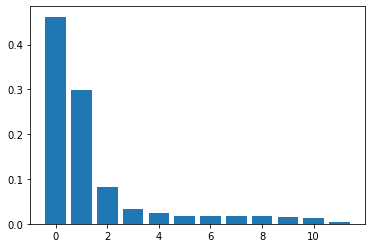

In [160]:
# 학습한 모델의 피쳐 중요도 그래프로 살펴봅니다
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

#학습한 모델의 피쳐 중요도 출력합니다
feat_labels =X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
#forest.feature_importances_로 순서를 맞춰 보여줘라
sorted(feature, key = lambda tup: tup[1], reverse = True)

In [177]:
old = new_data.groupby(['성별','y']).count()
old

연령    학력  장애여부   가구주  가구구성형태    시군   동읍면  가구거주_1  가구거주_2  가구거주_3  \
성별 y                                                                       
0  1   882   882   882   882     882   882   882     882     882     882   
   2  1110  1110  1110  1110    1110  1110  1110    1110    1110    1110   
   3   477   477   477   477     477   477   477     477     477     477   
   4   437   437   437   437     437   437   437     437     437     437   
   5   810   810   810   810     810   810   810     810     810     810   
1  1  1010  1010  1010  1010    1010  1010  1010    1010    1010    1010   
   2  1429  1429  1429  1429    1429  1429  1429    1429    1429    1429   
   3   570   570   570   570     570   570   570     570     570     570   
   4   408   408   408   408     408   408   408     408     408     408   
   5   936   936   936   936     936   936   936     936     936     936   

      가구거주_4  
성별 y          
0  1     882  
   2    1110  
   3     477  
   4     437  
   5     810  
1  1    1010  
   2    1429  
   3     570  
   4     408  
   5     936

In [161]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(forest, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0976 ± 0.0180,연령
0.0791 ± 0.0320,시군
0.0387 ± 0.0131,학력
0.0258 ± 0.0092,동읍면
0.0121 ± 0.0139,가구주
0.0099 ± 0.0089,가구구성형태
0.0087 ± 0.0089,가구거주_2
0.0074 ± 0.0107,가구거주_3
0.0057 ± 0.0081,성별
-0.0002 ± 0.0019,가구거주_4


In [162]:
#XGboost
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state = 0, n_estimator = 100, max_depth = 7, subsample = 0.8,gamma = 0.1).fit(X_train, y_train)

predict_train = xgb.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = xgb.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")


C:\Users\wodud\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 59.13 %
Accuracy: 37.79 %


In [209]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0989 ± 0.0199,연령
0.0803 ± 0.0100,시군
0.0379 ± 0.0169,가구주
0.0317 ± 0.0158,학력
0.0134 ± 0.0112,가구거주_1
0.0121 ± 0.0040,가구구성형태
0.0104 ± 0.0117,가구거주_3
0.0094 ± 0.0058,가구거주_2
0.0052 ± 0.0245,성별
0.0045 ± 0.0108,동읍면


In [213]:
from catboost import CatBoostClassifier
from sklearn import metrics
cb = CatBoostClassifier(silent=True, random_state = 0, n_estimators=300).fit(X_train, y_train)

print('train accuracy: ', metrics.accuracy_score(y_train, cb.predict(X_train)))
print('test accuracy: ', metrics.accuracy_score(y_test,cb.predict(X_test)))

train accuracy:  0.5254750757367116
test accuracy:  0.37670384138785623


In [214]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(cb, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0887 ± 0.0280,연령
0.0568 ± 0.0182,시군
0.0401 ± 0.0091,학력
0.0369 ± 0.0160,가구주
0.0183 ± 0.0133,가구거주_3
0.0136 ± 0.0075,가구거주_2
0.0099 ± 0.0209,성별
0.0094 ± 0.0142,동읍면
0.0089 ± 0.0036,가구구성형태
0.0032 ± 0.0049,장애여부


In [163]:
abs(new_data.corr(method = 'spearman')["y"]).sort_values(ascending = False)[:30]

y         1.000000
연령        0.110647
가구구성형태    0.051790
가구거주_4    0.031807
가구주       0.030740
가구거주_3    0.027040
시군        0.019689
성별        0.013415
가구거주_1    0.013223
가구거주_2    0.010985
동읍면       0.010783
학력        0.008806
장애여부      0.001315
Name: y, dtype: float64

In [164]:
abs(new_data.corr(method = 'pearson')["y"]).sort_values(ascending = False)[:30]

y         1.000000
연령        0.171678
가구구성형태    0.058901
가구주       0.035533
가구거주_4    0.032824
가구거주_3    0.029140
학력        0.026824
시군        0.017662
성별        0.016505
가구거주_2    0.013828
가구거주_1    0.011966
동읍면       0.009759
장애여부      0.000444
Name: y, dtype: float64

In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7262 entries, 3169 to 5655
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   가구거주_1  7262 non-null   uint8
 1   가구거주_2  7262 non-null   uint8
 2   가구거주_3  7262 non-null   uint8
 3   가구거주_4  7262 non-null   uint8
 4   가구구성형태  7262 non-null   int64
 5   가구주     7262 non-null   int64
 6   동읍면     7262 non-null   int64
 7   성별      7262 non-null   int32
 8   시군      7262 non-null   int32
 9   연령      7262 non-null   int64
 10  장애여부    7262 non-null   int64
 11  학력      7262 non-null   int64
dtypes: int32(2), int64(6), uint8(4)
memory usage: 482.2 KB
